In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [215]:
df=pd.read_csv('/content/customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0.0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0.0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0.0,Yes,Yes,11.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1.0,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [216]:
df.shape

(7043, 21)

In [217]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7036.000000,7030.000000,7027.000000
mean,0.162024,32.367568,64.757855
std,0.368499,24.560644,30.091845
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7036 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7030 non-null   float64
 6   PhoneService      7030 non-null   object 
 7   MultipleLines     7030 non-null   object 
 8   InternetService   7006 non-null   object 
 9   OnlineSecurity    7028 non-null   object 
 10  OnlineBackup      7028 non-null   object 
 11  DeviceProtection  7028 non-null   object 
 12  TechSupport       7028 non-null   object 
 13  StreamingTV       7021 non-null   object 
 14  StreamingMovies   7029 non-null   object 
 15  Contract          7018 non-null   object 
 16  PaperlessBilling  7029 non-null   object 


In [219]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,7
Partner,0
Dependents,0
tenure,13
PhoneService,13
MultipleLines,13
InternetService,37
OnlineSecurity,15


In [220]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [221]:
df.drop(['customerID'],axis=1,inplace=True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0.0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0.0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0.0,Yes,Yes,11.0,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1.0,Yes,No,4.0,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [222]:
# Convert TotalCharges to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Define categorical and numerical columns
categorical_cols = [
    "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity",
    "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV",
    "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod"
]
numerical_cols = ["SeniorCitizen", "tenure", "MonthlyCharges", "TotalCharges"]

# Fill categorical columns with mode
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Fill numerical columns with median
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Confirm no missing values remain
print(df.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [223]:
# Normalize values (example)
df['PhoneService'] = df['PhoneService'].replace({'No phone service': 'No'})
df['OnlineSecurity'] = df['OnlineSecurity'].replace({'No internet service': 'No'})
df['OnlineBackup'] = df['OnlineBackup'].replace({'No internet service': 'No'})
df['DeviceProtection'] = df['DeviceProtection'].replace({'No internet service': 'No'})
df['TechSupport'] = df['TechSupport'].replace({'No internet service': 'No'})
df['StreamingTV'] = df['StreamingTV'].replace({'No internet service': 'No'})
df['StreamingMovies'] = df['StreamingMovies'].replace({'No internet service': 'No'})

In [224]:
# Encode binary categorical features (Yes/No, Male/Female) using map
binary_map = {"Yes": 1, "No": 0, "Male": 1, "Female": 0}
for col in ["Partner", "Dependents", "PhoneService","Churn", "gender","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies", "PaperlessBilling"]:
  df[col] = df[col].map(binary_map)

import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame
label_encoder = LabelEncoder()
columns_to_encode = [
     "InternetService", "MultipleLines", "Contract","PaperlessBilling", "PaymentMethod"
]

# Apply LabelEncoder to each column
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

# Check the result
print(df[columns_to_encode].head())

# Check final shape
print("Data shape after preprocessing:", df.shape)

   InternetService  MultipleLines  Contract  PaperlessBilling  PaymentMethod
0                0              1         0                 1              2
1                0              0         1                 0              3
2                0              0         0                 1              3
3                0              1         1                 0              0
4                1              0         0                 1              2
Data shape after preprocessing: (7043, 20)


In [225]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0.0,1,0,1.0,0,1,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0.0,0,0,34.0,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,1,0.0,0,0,2.0,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0.0,0,0,45.0,0,1,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0.0,0,0,2.0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0.0,1,1,24.0,1,2,0,1,0,1,1,1,1,1,1,3,84.80,1990.50,0
7039,0,0.0,1,1,72.0,1,2,1,0,1,1,0,1,1,1,1,1,103.20,7362.90,0
7040,0,0.0,1,1,11.0,0,1,0,1,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1.0,1,0,4.0,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


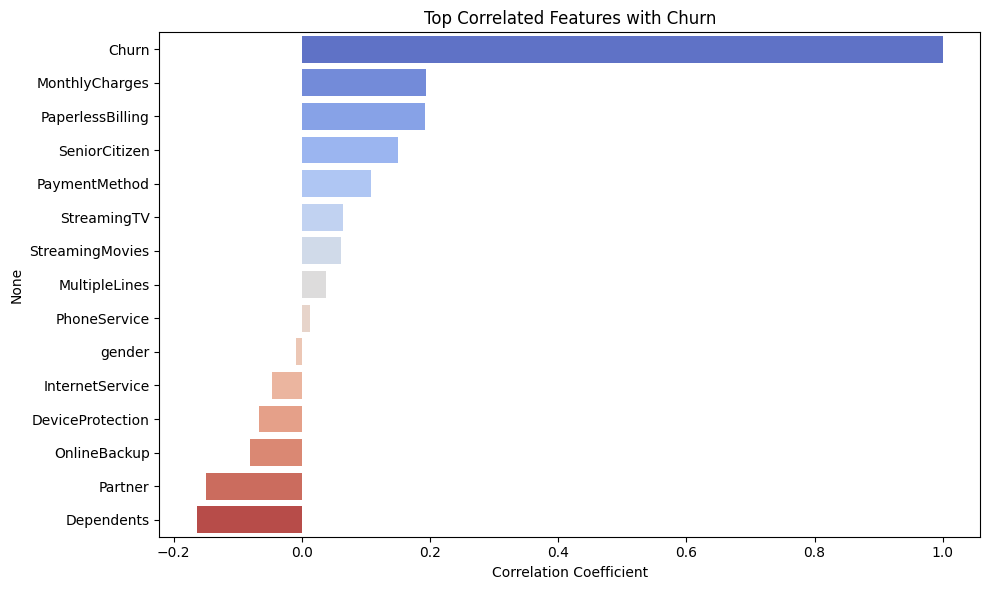

In [226]:
# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)
churn_corr = corr_matrix["Churn"].sort_values(ascending=False)

# Plot top correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_corr.values[:15], y=churn_corr.index[:15], palette="coolwarm")
plt.title("Top Correlated Features with Churn")
plt.xlabel("Correlation Coefficient")
plt.tight_layout()
plt.show()

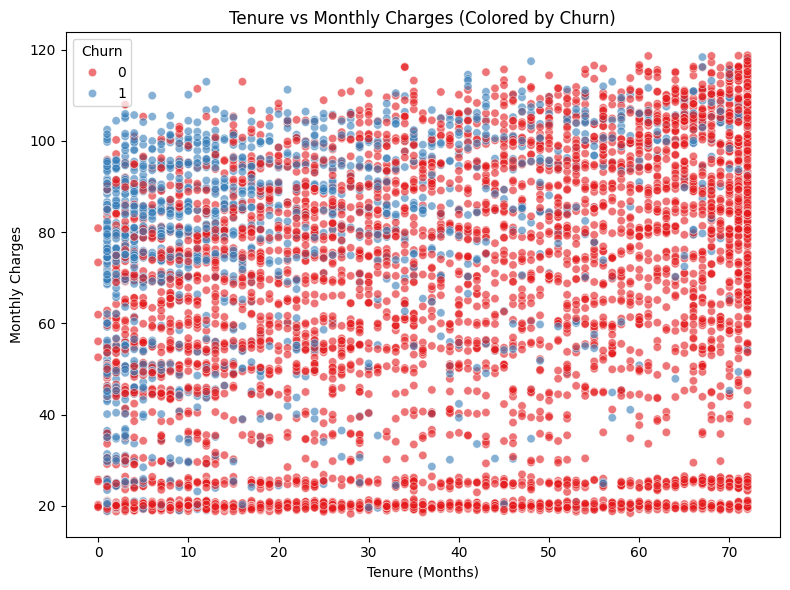

In [227]:
# --- Scatter plot: MonthlyCharges vs Tenure colored by Churn ---
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="tenure", y="MonthlyCharges", hue="Churn", palette="Set1", alpha=0.6)
plt.title("Tenure vs Monthly Charges (Colored by Churn)")
plt.xlabel("Tenure (Months)")
plt.ylabel("Monthly Charges")
plt.tight_layout()
plt.show()

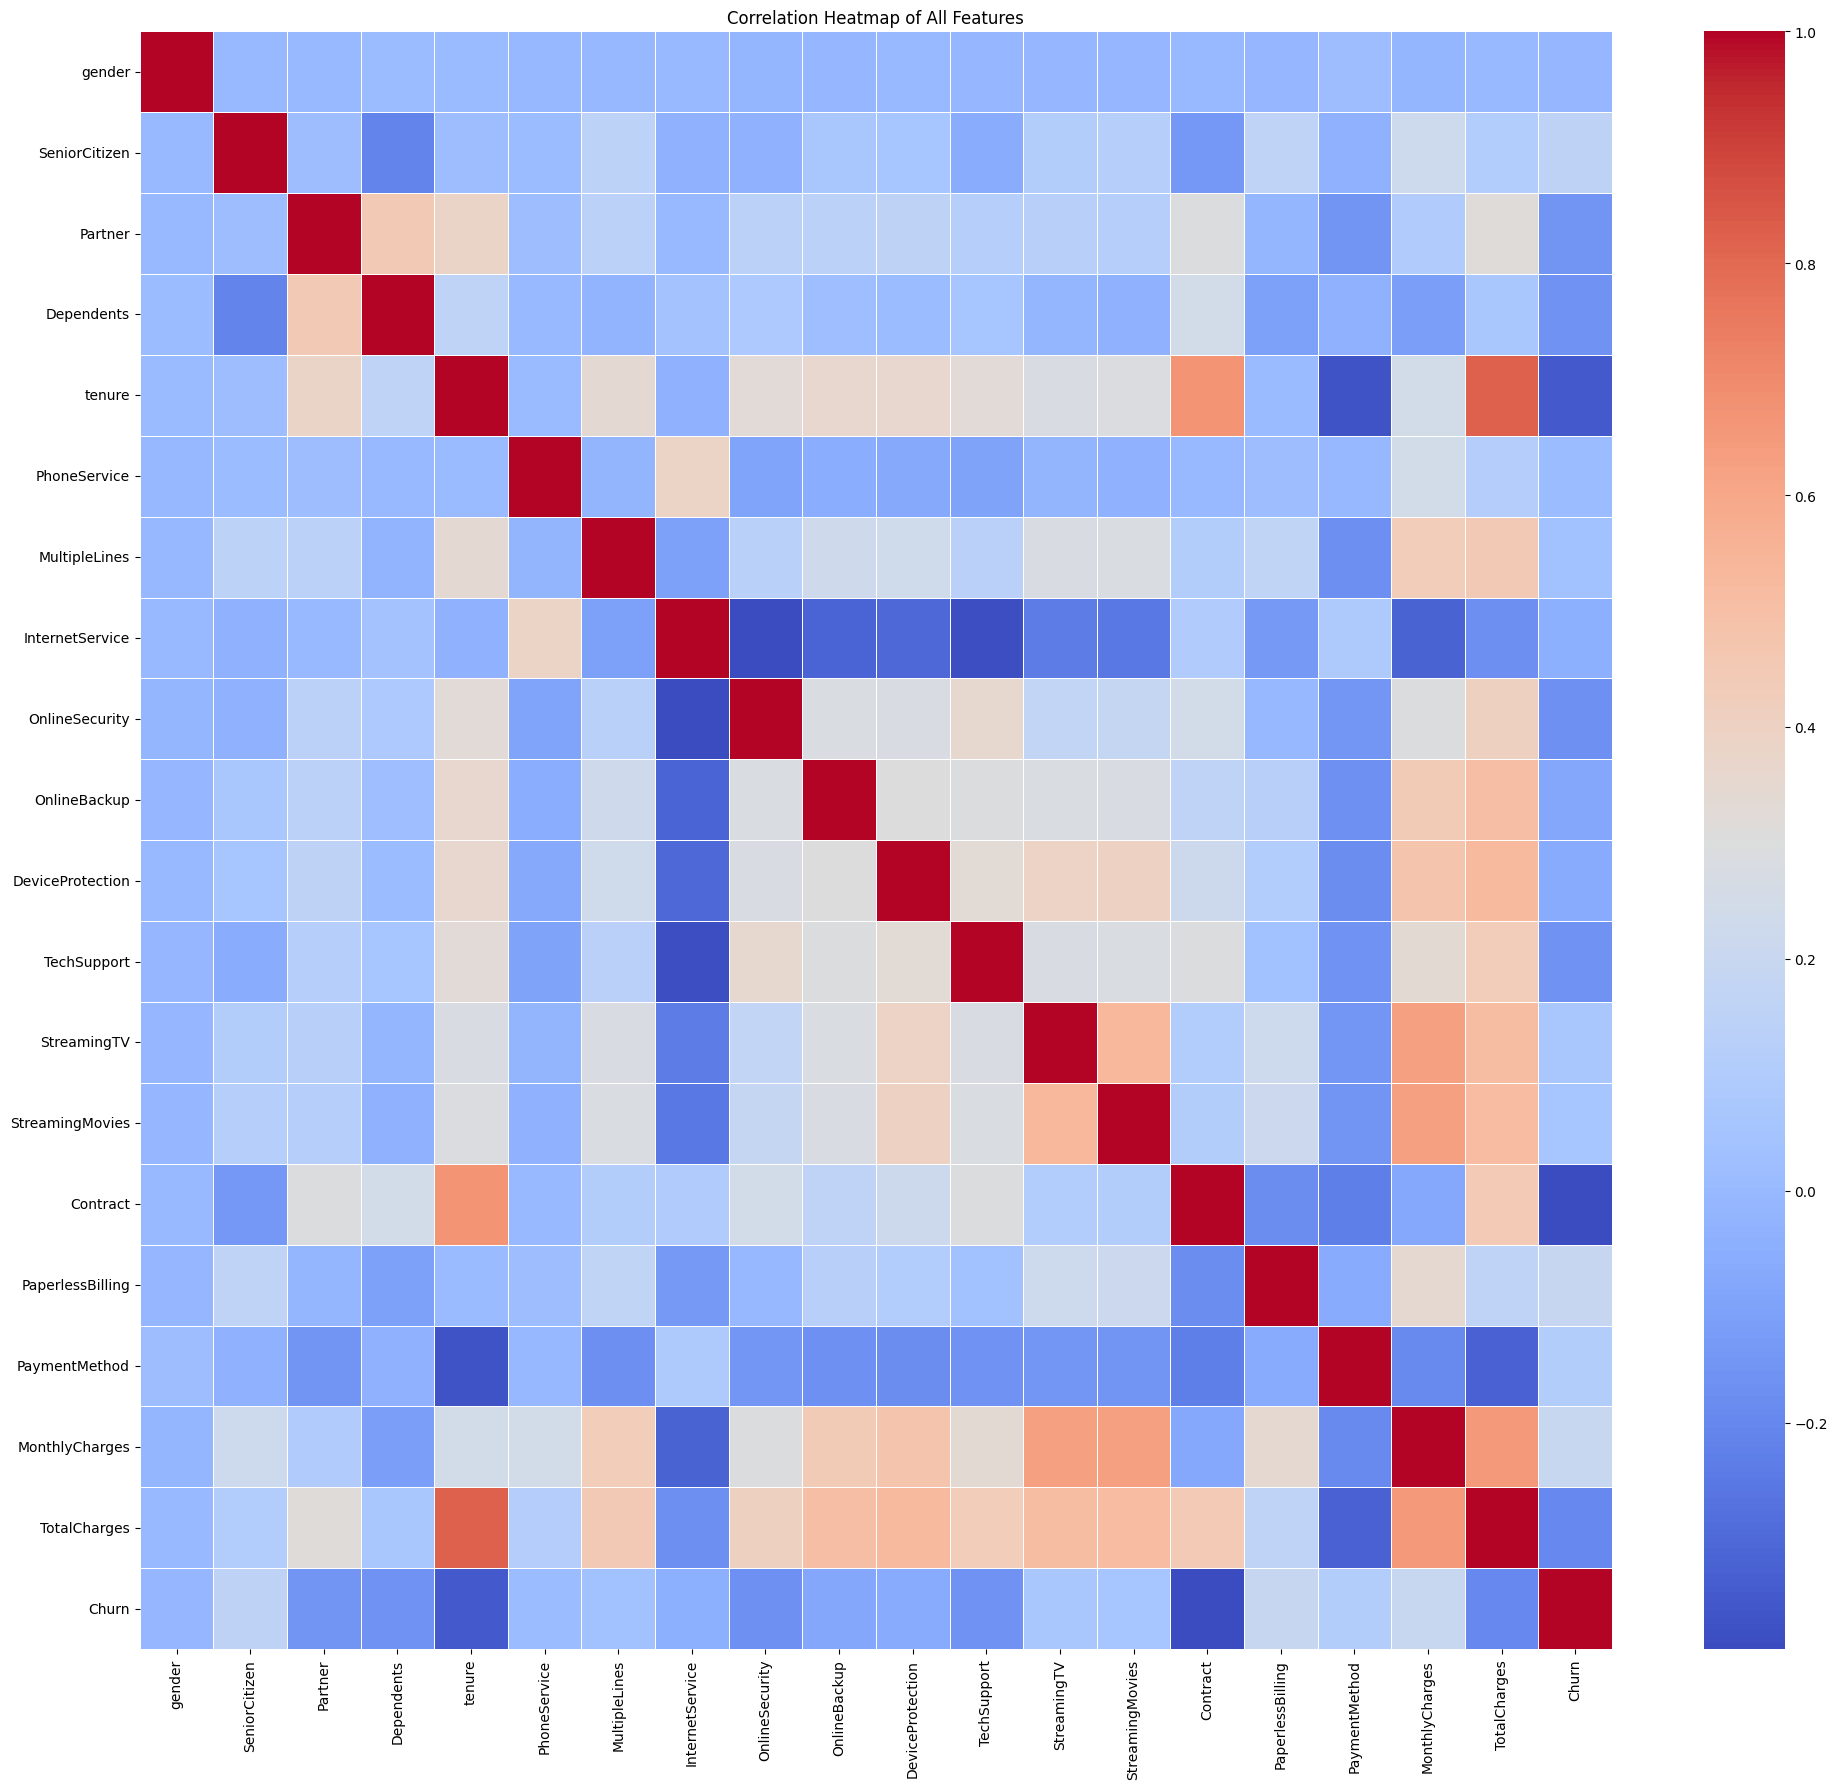

In [228]:
# Create correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Correlation Heatmap of All Features")
plt.tight_layout()
plt.show()

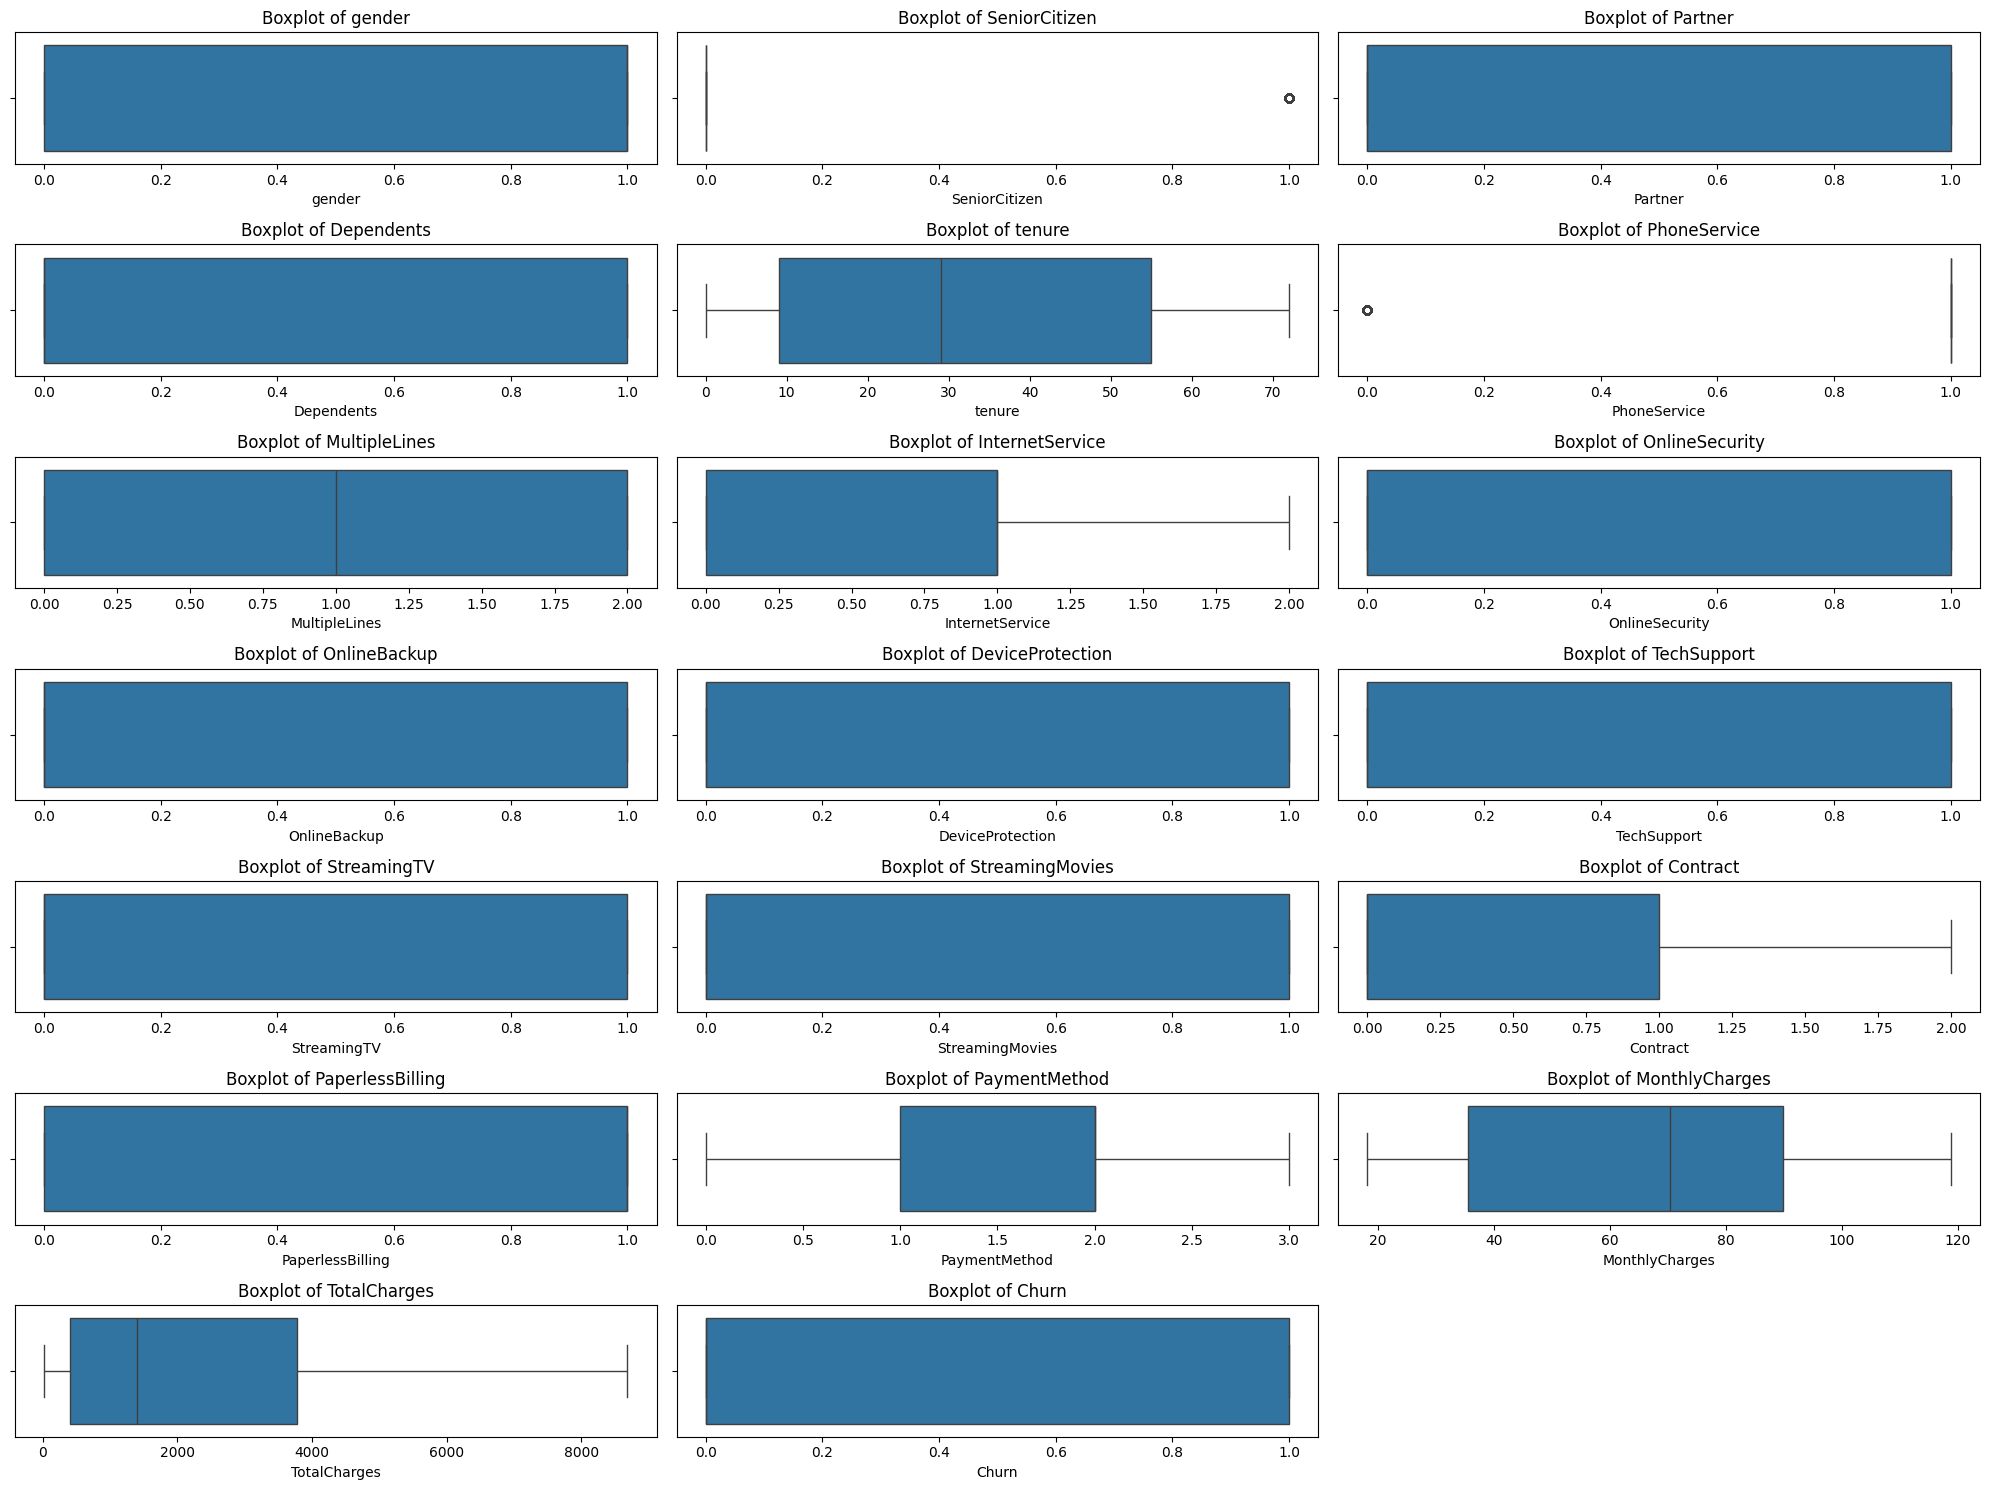

In [229]:
# Select only numeric features
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot boxplots for each numerical feature
plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_cols):
    plt.subplot((len(numeric_cols) + 2) // 3, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [230]:
# Detect outliers using IQR for each numeric column
outlier_indices = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))].index
    outlier_indices[col] = outliers.tolist()

# Example: Print number of outliers per feature
for col, indices in outlier_indices.items():
    print(f"{col}: {len(indices)} outliers")

gender: 0 outliers
SeniorCitizen: 1140 outliers
Partner: 0 outliers
Dependents: 0 outliers
tenure: 0 outliers
PhoneService: 681 outliers
MultipleLines: 0 outliers
InternetService: 0 outliers
OnlineSecurity: 0 outliers
OnlineBackup: 0 outliers
DeviceProtection: 0 outliers
TechSupport: 0 outliers
StreamingTV: 0 outliers
StreamingMovies: 0 outliers
Contract: 0 outliers
PaperlessBilling: 0 outliers
PaymentMethod: 0 outliers
MonthlyCharges: 0 outliers
TotalCharges: 0 outliers
Churn: 0 outliers


In [233]:
float_cols = df.select_dtypes(include=['float']).columns
df[float_cols] = df[float_cols].fillna(0).astype(int)

In [234]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,2,29,29,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56,1889,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53,108,1
3,1,0,0,0,45,0,1,0,1,0,1,1,0,0,1,0,0,42,1840,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70,151,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,1,0,1,1,1,1,1,1,3,84,1990,0
7039,0,0,1,1,72,1,2,1,0,1,1,0,1,1,1,1,1,103,7362,0
7040,0,0,1,1,11,0,1,0,1,0,0,0,0,0,0,1,2,29,346,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74,306,1


In [235]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score
)

# --- STEP 1: Split features and target ---
X = df.drop(columns=['Churn'])  # Features
y = df['Churn']                 # Target

# --- STEP 2: Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- STEP 3: Define models ---
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# --- STEP 4: Train and evaluate ---
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"\n=== {name} ===")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba):.4f}")


=== Logistic Regression ===
Accuracy: 0.8155
Confusion Matrix:
 [[933 103]
 [157 216]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409

ROC AUC Score: 0.8590

=== Random Forest ===
Accuracy: 0.7885
Confusion Matrix:
 [[940  96]
 [202 171]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1036
           1       0.64      0.46      0.53       373

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.77      0.79      0.78      1409

ROC AUC Score: 0.8318

=== XGBoost ===
Accuracy: 0.7878
Confusion Matrix:
 [[921 115]
 [184 189]]
Classifi


=== Logistic Regression ===
Accuracy: 0.8155
Confusion Matrix:
 [[933 103]
 [157 216]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409

ROC AUC Score: 0.8590

=== Random Forest ===
Accuracy: 0.7885
Confusion Matrix:
 [[940  96]
 [202 171]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1036
           1       0.64      0.46      0.53       373

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.77      0.79      0.78      1409

ROC AUC Score: 0.8318

=== XGBoost ===
Accuracy: 0.7878
Confusion Matrix:
 [[921 115]
 [184 189]]
Classifi

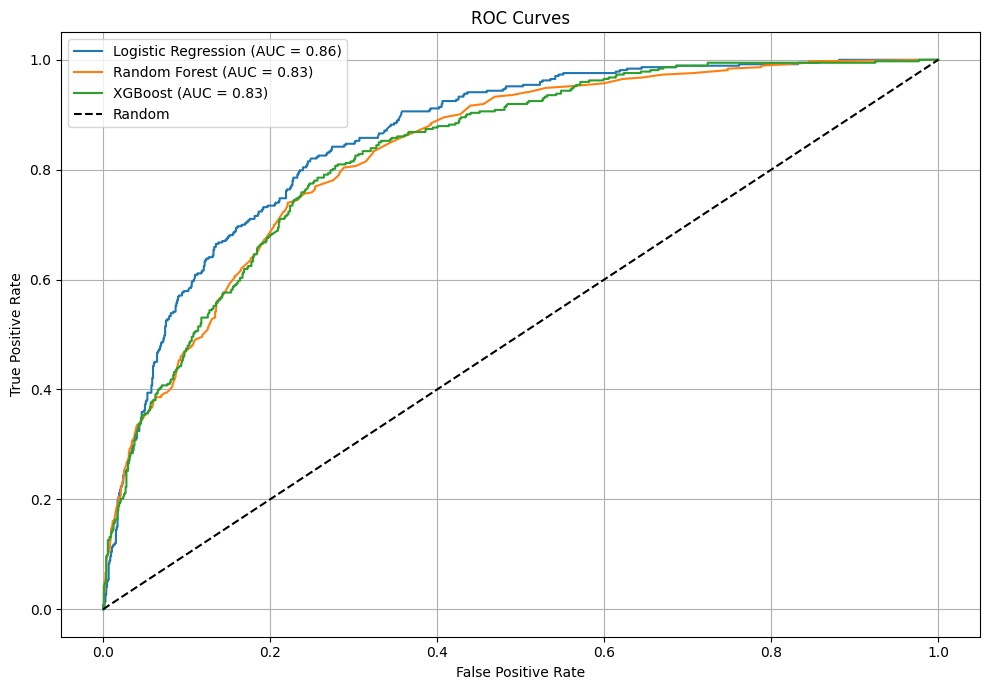

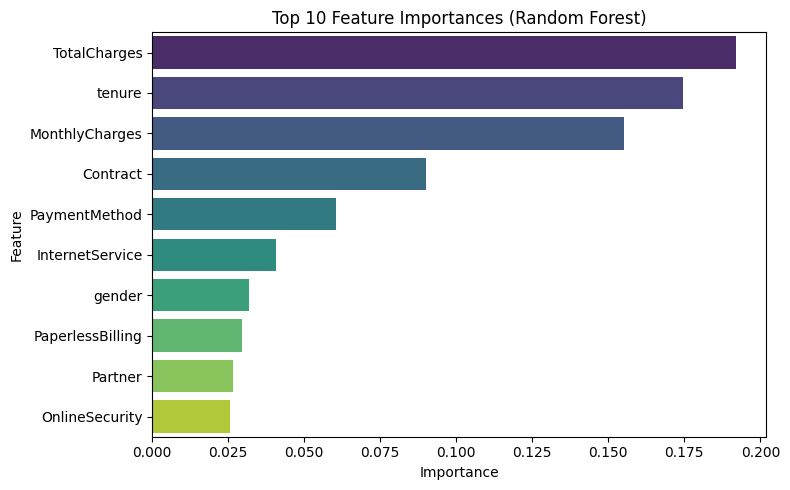

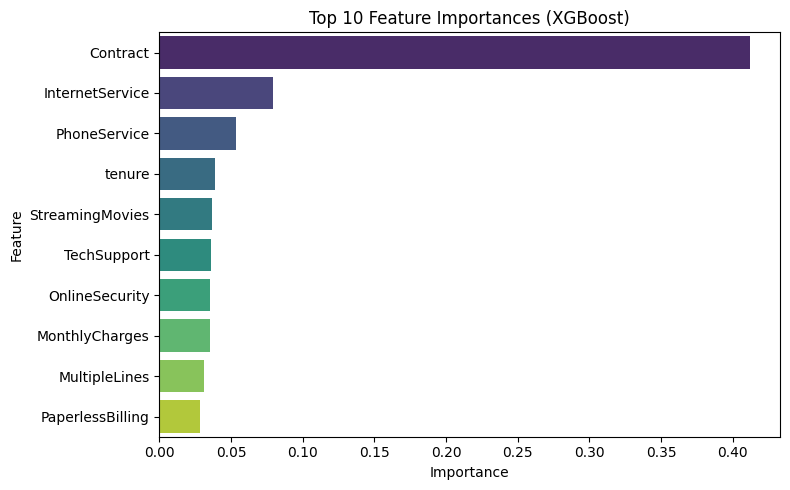

In [236]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)

# --- STEP 1: Split features and target ---
X = df.drop(columns=['Churn'])  # Replace with your target name if different
y = df['Churn']

# --- STEP 2: Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- STEP 3: Define models ---
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# --- STEP 4: Train, Evaluate, and Visualize ---
plt.figure(figsize=(10, 7))
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"\n=== {name} ===")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba):.4f}")

    # --- ROC Curve ---
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_proba):.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Feature Importance Plots (Random Forest & XGBoost only) ---
def plot_feature_importance(model, model_name):
    importances = model.feature_importances_
    feature_names = X.columns
    feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_df = feature_df.sort_values(by='Importance', ascending=False).head(10)

    plt.figure(figsize=(8, 5))
    sns.barplot(data=feature_df, x='Importance', y='Feature', palette='viridis')
    plt.title(f'Top 10 Feature Importances ({model_name})')
    plt.tight_layout()
    plt.show()

# Plot for Random Forest
plot_feature_importance(models["Random Forest"], "Random Forest")

# Plot for XGBoost
plot_feature_importance(models["XGBoost"], "XGBoost")


In [238]:
df.to_csv("processed_customer_churn.csv", index=False)
print("File saved as 'processed_customer_churn.csv'")

File saved as 'processed_customer_churn.csv'
